<a href="https://colab.research.google.com/github/BoyoungH/FrontEnd-Class/blob/main/2_(Hugging%2B%ED%95%9C%EA%B8%80BERT)%EB%84%A4%EC%9D%B4%EB%B2%84_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_90_%EB%8B%AC%EC%84%B1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huggingface로 BERT 빠르게 돌려보기 with 네이버 영화 평가 감성분석
# Youtube 공무원AI


<a href="https://colab.research.google.com/github/kimwoonggon/publicservant_AI/blob/master/2_%ED%95%9C%EA%B8%80BERT%2BHuggingFace%20%EB%84%A4%EC%9D%B4%EB%B2%84%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D%2090%25%20%EB%8B%AC%EC%84%B1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 버트 모형 소개**

버트 모형은 2018년 11월 구글이 공개한 인공지능(AI) 언어 모델로써 기존 자연어 모델의 성능을 가볍게 뛰어넘었으며, 일부 성능 평가에서는 인간보다 더 높은 성능을 기록한 모델입니다. BERT는 Bidirectional Encoder Representations from Transformers의 약자로 18년 10월 구글에 의해 논문이 공개되었습니다.
버트 모형의 특징은 사전학습, 문맥학습, 파인튜닝을 들 수 있습니다.

(사전학습) 위키피디아 같은 아주 큰 데이터들을 사용하여 '언어 이해' 모델을 사전학습(Pre-training)한다. 광범위한 데이터로 인간이 살아오면서 체득한 지식과 같이 다양한 데이터를 학습하게 됩니다.
(문맥학습1) 문장 순서를 학습하여 다음에 나온 문장이 순서에 맞는 문장인지 학습합니다.

  => 문장1: 저 남자는 회사에 출근했다
  => 문장2: 회사에 출근하자마자 저 남자는 커피를 끓여 마셨다. (순서가 맞음)

  => 문장3: 저 여자는 퇴근하려 한다.
  => 문장4: 강아지는 예쁘다. (순서가 틀린 문장)

(문맥학습2) 양방향으로 학습하여 가려진 단어를 맞춘다.
    문장 : 저 남자는 (①)에 출근했다. 회사에 출근하자마자 저 남자는 (②)를 마셨다.
  => ① : 회사 ② : 커피

(파인튜닝) 이미 사람처럼 광범위한 글을 학습한 인공지능을 기반으로 하여 새로운 과제를 해결하게 됩니다. 이미 기반 지식이 있기 때문에 새로운 것을 쉽고 빠르게 학습할 수 있습니다.
본 실습에서는 네이버 영화 평가 댓글로 긍정 부정인지를 예측하는 버트 모형을 생성해 보겠습니다.

**2. 버트라는 도구를 활용하여 네이버 영화 평가 댓글 긍정 부정 예측하기**

버트라는 모형에 영화를 평가하는 댓글을 인풋으로 넣으면 평가가 긍정인지 부정인지를 예측하게 됩니다. 긍정에 가까우면 1을, 부정에 가까우면 0을 출력하게 됩니다.
함수로 표현하면 버트 모형 함수 function(영화댓글) = 1 or 0입니다.
그림으로 살펴보도록 하겠습니다.

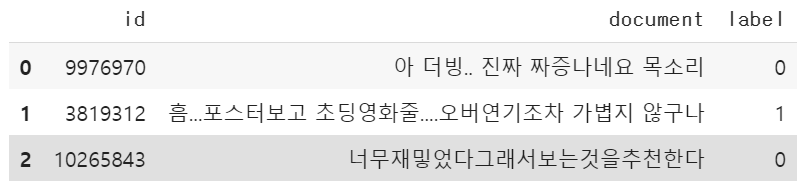

네이버 영화 감성분석을 위해 파일을 불러왔습니다. 긍정은 1, 부정은 0으로 라벨링 되어 있습니다. 이 데이터를 활용하여 댓글을 인풋으로 넣으면 긍정인지 부정인지 예측하는 값을 예측하는 인공지능 모형을 생성합니다.
본 실습에서는 광범위한 데이터로 사전 훈련된 인공지능 모형을 네이버 영화 감성 분석 데이터로 파인튜닝(추가학습)하여 아래 그림과 같은 긍정 부정을 예측하는 모형을 만들고자 합니다.

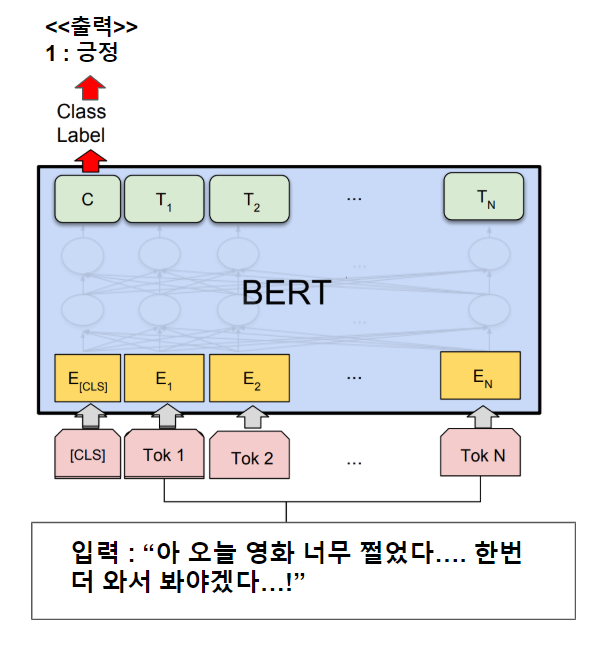


- NSMC는 Naver의 영화 리뷰를 기반으로 구축된 웹 텍스트 기반 감성 분석 텍스트입니다
- 여기서는 🤗 Model Hub에서 일반적인 한국어 텍스트로 구축된 BERT 모델과, 댓글로 구축한 BERT 모델을 각각 불러와 Fine-Tuning하여 결과를 비교해 봅니다
- 📔NOTE: 빠른 실행을 위해 Runtime 유형을 'GPU'로 해 주세요

## 3 HuggingFace 소개
![대체 텍스트](https://i.imgur.com/6DM516z.png)  
![대체 텍스트](https://i.imgur.com/g6R67h4.png)    
https://huggingface.co/transformers/

HuggingFace는 자연어 처리 인공지능 모델에서, BERT 모델 같은 트랜스포머 모델들을 쉽게 다룰 수 있게 해주는 패키지입니다.  
기본적으로 pytorch 기반으로 만들어져 있지만, 텐서플로우 2.0에서도 본 패키지를 사용 가능합니다.  
텐서플로우 2.0은 기존 케라스를 포함하고 있기 때문에, 기존 텐서플로우나 케라스에 익숙하신 분들이 쉽게 사용할 수 있습니다.  
텐서플로우 2.0 기반의 huggingface 사용 방법을 네이버 영화 긍부정 분석을 실습하면서 배워 보도록 하겠습니다.  
또한 이번에는 구글의 Multilingual BERT 보다는 한글로 학습된 KOBERT를 활용하여 네이버 감성분석을 해보도록 하겠습니다.

#목차
이번 실습은 <b>1) 네이버 감성분석 데이터 불러오기 및 전처리 2) BERT 인풋 만들기 3) 버트를 활용한 감성분석 모델 만들기 4) 훈련 및 성능 검증 5) 실제 데이터로 실습하기</b>로 구성되어 있습니다.

# 한글 BERT(KOBERT)를 활용하여 네이버 감성분석 만들기

huggingface 패키지를 Colab에 설치합니다

In [ ]:
!pip install transformers

In [ ]:
!nvidia-smi
!pip install sentencepiece

Tue Aug 22 02:26:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

텐서플로우 2와 필요한 모듈들을 임포트합니다.  
최근에 텐서플로우 기본 버전은 2로 바뀌었습니다.

In [ ]:
import jax
print("JAX Version:", jax.__version__)

import transformers
print("Transformers Version:", transformers.__version__)


JAX Version: 0.4.13
Transformers Version: 4.31.0


In [ ]:
!pip install jax==0.4.13
!pip install jaxlib==0.4.13
#!pip install transformer

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import sentencepiece as spm

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

구글 드라이브와 Colab을 연동합니다.

이번 예제에서 사용할 네이버 영화 감상분석 데이터를 다운로드 합니다

In [ ]:
# 네이버 영화 감성분석 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 17.79 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Updating files: 100% (14737/14737), done.


In [ ]:
os.listdir('nsmc')

['.git',
 'ratings_train.txt',
 'README.md',
 'code',
 'synopses.json',
 'ratings.txt',
 'raw',
 'ratings_test.txt']

딥러닝 훈련에 사용 할 train 데이터와 test 데이터를 pandas dataframe 형식으로 불러옵니다.

In [ ]:
train = pd.read_table("nsmc/"+"ratings_train.txt")
test = pd.read_table("nsmc/"+"ratings_test.txt")

In [ ]:
train[50:70]

,id,document,label
50,9063648,영화가 사람의 영혼을 어루만져 줄 수도 있군요 거친 세상사를 잠시 잊고 동화같은 영...,1
51,8272095,야 세르게이! 작은고추의 매운맛을 보여주마! 포퐁저그 콩진호가 간다,0
52,2345905,이렇게 가슴시리게 본 드라마가 또 있을까? 감동 그 자체!,1
53,7865630,"난또 저 꼬마애가 무슨 원한이 깊길래.,. 했더니 OO 그냥 혼자 나대다 OO걸 어...",0
54,7207064,재미있어요,1
55,5719655,전 좋아요,1
56,1651126,최고,0
57,7246040,너무 충격적이엇다. 기분을 완전히 푹 꺼지게 하는 느낌... 활력이라고는 하나도 없...,1
58,717775,심심한영화.,0
59,8317483,백봉기 언제나오나요?,1


## 버트 인풋 만들기

한글 데이터를 분석하려면, 100개가 넘는 언어에 대해 훈련된 버트를 사용해야 합니다.  
이번에는 한국어 데이터로 훈련되었고, SKT에서 만든 KoBERT를 사용하도록 하겠습니다.  
모델을 로드하기에 앞서, 토크나이저를 불러오도록 하겠습니다.  
huggingface에서는 아주 쉽게 토크나이저를 불러올 수 있습니다.  
https://github.com/monologg/KoBERT-NER 에서 kobert를 tokenize 할 수 있는 코드를 가져왔습니다.

In [ ]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

kobert 토크나이즈를 임포트합니다.

In [ ]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

loading file tokenizer_78b3253a26.model from cache at /root/.cache/huggingface/hub/models--monologg--kobert/snapshots/30941062c0f3dde73b246468f449f2448c7694bc/tokenizer_78b3253a26.model
loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--monologg--kobert/snapshots/30941062c0f3dde73b246468f449f2448c7694bc/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--monologg--kobert/snapshots/30941062c0f3dde73b246468f449f2448c7694bc/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--monologg--kobert/snapshots/30941062c0f3dde73b246468f449f2448c7694bc/config.json
Model config BertConfig {
  "_name_or_path": "monologg/kobert",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 8002
}

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Be

버트를 사용하기에 앞서 가장 기초에 속하는 tokenizer 사용 방법에 대해서 잠시 배워보도록 하겠습니다.  
tokenizer.encode => 문장을 버트 모델의 인풋 토큰값으로 바꿔줌  
tokenizer.tokenize => 문장을 토큰화

In [ ]:
print(tokenizer.encode("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))

[2, 2366, 5678, 5678, 1192, 1804, 6166, 5760, 3415, 4638, 3272, 3133, 6926, 3]


In [ ]:
print(tokenizer.tokenize("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))
print(tokenizer.tokenize("보는내내그대로들어맞는예측카리스마없는악역"))

['▁보는', '내', '내', '▁그대로', '▁들어', '맞', '는', '▁예측', '▁카리스마', '▁없는', '▁악', '역']
['▁보는', '내', '내', '그', '대로', '들어', '맞', '는', '예', '측', '카', '리스', '마', '없는', '악', '역']


우리가 네이버 영화 평가 긍부정 분석을 위해, train 15만개의 데이터를 버트의 인풋 값으로 바꿔주겠습니다.  
버트의 인풋은 토큰, 세그멘트, 마스크로 나눠집니다.  
이 세 값이 버트 모형에 들어가서, 버트 모형에 맞게 고차원으로 임베딩이 되게 되는 원리입니다.  

토큰은 말 그대로 단어를 단어사전의 위치값으로 표현해주는 것이며,
세그멘트는 버트 모형에서 문장이 앞 문장인지, 뒷 문장인지 표현해주는 것입니다.(본 예제는 인풋으로 문장이 하나만 들어가므로 0으로 통일)  
마스크는 문장이 유효한 값인지, 아니면 유효하지 않은 값이라 패딩 값으로 채운 것인지를 나타냅니다.  
문장이 유효한 값이면 1로 채우고, 유효하지 않은 값이면 0으로 채우게 됩니다.  
문장마다 문장 길이는 다르지만, 버트의 인풋 길이는 일정해야 하므로, 버트에서 지정한 문장 길이를 초과하면 패딩값인 0을 채우게 됩니다.



*   세그먼트는 예를 들어 문장이 두 개가 있다면, 앞의 문장과 뒤의 문장을 구분하는 것입니다.
포지션 임베딩은 단순히 단어의 위치를 말합니다.
토큰, 세그먼트, 포지션을 인풋으로 버트 모형에 넣으면 기하학적인 문장 공간으로 임베딩이 됩니다.

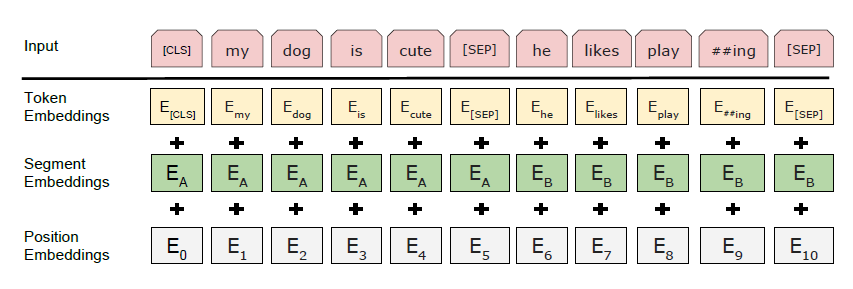




*   (토큰) 첫번째 인풋은 토큰화 된 것이 인덱싱되어 숫자로 변환된 것
*   (세그멘트) 두번째 인풋은 앞문장인지 뒷문장인지 알려주는 숫자들입니다. 이번 튜토리얼에서는 파인튜닝 과정이라 앞문장 뒷문장 구분을 안하기 때문에 모두 0으로 하였습니다.
*   (포지션) 단어 순서에 따라서 자동으로 부여됩니다.





In [ ]:
print(tokenizer.tokenize("전율을 일으키는 영화. 다시 보고싶은 영화"))

['▁전', '율을', '▁일으키', '는', '▁영화', '.', '▁다시', '▁보고', '싶', '은', '▁영화']


In [ ]:
print(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화"))

[2, 4012, 7071, 3815, 5760, 3394, 54, 1574, 2358, 6751, 7086, 3394, 3]


In [ ]:
print(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화", max_length=64, pad_to_max_length=True))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[2, 4012, 7071, 3815, 5760, 3394, 54, 1574, 2358, 6751, 7086, 3394, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


토큰 인풋의 예를 들면 다음과 같습니다.  
문장을 토크나이징 하면 "전율을 일으키는 영화. 다시 보고싶은 영화"가  
"'전', '##율', '##을', '일', '##으', '##키는', '영화', '.', '다시', '보고', '##싶', '##은', '영화'" 로 토크나이징이 됩니다.  
이거를 버트 인풋에 들어갈 숫자로 바꿔주면,  
["101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102"]  
로 바뀌게 됩니다. 여기 나오는 숫자들이 버트 인풋에 들어가는 토큰 인풋입니다.  
버트 모형에 들어가는 인풋은 사실 일정한 길이를 가져야 합니다.(본 예제에서는 64)  
따라서 남는 부분은 0으로 채워지게 됩니다(패딩)

In [ ]:
# 세그멘트 인풋
print([0]*64)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


세그멘트 인풋은 문장이 앞문장인지 뒷문장인지 구분해주는 역할을 하는데요  
본 문장에서는 문장 하나만 인풋으로 들어가기 때문에 0만 들어가게 되고, 문장 길이만큼의 0이 인풋으로 들어가게 됩니다.

In [ ]:
# 마스크 인풋
valid_num = len(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화"))
print(valid_num * [1] + (64 - valid_num) * [0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


마스크 인풋은 토큰 인풋에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 두게 됩니다.

종합하면,  
버트의 인풋은 토큰, 세그먼트, 마스크로 이루어져 있습니다.  
"전율을 일으키는 영화. 다시 보고싶은 영화" 라는 문장을 가지고 예를 들면,

토큰 인풋 : [101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

세그먼트 인풋 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

마스크 인풋 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

네이버 영화 평가 문장들을 버트 인풋으로 바꿔보도록 하겠습니다.  
문장이 토큰 인풋, 세그먼트 인풋, 마스크 인풋으로 변환 됩니다.  
huggingface에서는 순서가 [토큰 인풋, 마스크 인풋, 세그먼트 인풋] 입니다.

In [ ]:
def convert_data(data_df):
    global tokenizer

    SEQ_LEN = 64 #SEQ_LEN : 버트에 들어갈 인풋의 길이

    tokens, masks, segments, targets = [], [], [], []

    for i in tqdm(range(len(data_df))):
        # token : 문장을 토큰화함
        token = tokenizer.encode(data_df[DATA_COLUMN][i], truncation=True, padding='max_length', max_length=SEQ_LEN)

        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros

        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

SEQ_LEN = 64
BATCH_SIZE = 32
# 긍부정 문장을 포함하고 있는 칼럼
DATA_COLUMN = "document"
# 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
LABEL_COLUMN = "label"

# train 데이터를 버트 인풋에 맞게 변환
train_x, train_y = load_data(train)

100%|██████████| 150000/150000 [00:56<00:00, 2644.77it/s]


In [ ]:
# 훈련 성능을 검증한 test 데이터를 버트 인풋에 맞게 변환
test_x, test_y = load_data(test)

100%|██████████| 50000/50000 [00:10<00:00, 4649.28it/s]


## 버트를 활용한 감성분석 모델 만들기

In [ ]:
model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--monologg--kobert/snapshots/30941062c0f3dde73b246468f449f2448c7694bc/config.json
Model config BertConfig {
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 8002
}



loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--monologg--kobert/snapshots/30941062c0f3dde73b246468f449f2448c7694bc/pytorch_model.bin
Loading PyTorch weights from /root/.cache/huggingface/hub/models--monologg--kobert/snapshots/30941062c0f3dde73b246468f449f2448c7694bc/pytorch_model.bin
PyTorch checkpoint contains 92,186,880 parameters
Loaded 92,186,880 parameters in the TF 2.0 model.
All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert_outputs

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 64, 768) dtype=float32 (created by layer 'tf_bert_model')>, pooler_output=<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model')>, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)

In [ ]:
bert_outputs = bert_outputs[1]

In [ ]:
# Rectified Adam 옵티마이저 사용
!pip install tensorflow_addons
import tensorflow_addons as tfa
# 총 batch size * 4 epoch = 2344 * 4
opt = tfa.optimizers.RectifiedAdam(lr=5.0e-5, total_steps = 2344*2, warmup_proportion=0.1, min_lr=1e-5, epsilon=1e-08, clipnorm=1.0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/optimizers/rectified_adam.py:121: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
sentiment_drop = tf.keras.layers.Dropout(0.5)(bert_outputs)
sentiment_first = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(sentiment_drop)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
sentiment_model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 64)]         0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 64)]         0           []                               
                                                                                                  
 input_segment (InputLayer)     [(None, 64)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  92186880    ['input_word_ids[0][0]',         
                                thPoolingAndCrossAt               'input_masks[0][0]',        

## 훈련 및 성능 검증

In [ ]:
sentiment_model.fit(train_x, train_y, epochs=2, shuffle=True, batch_size=64, validation_data=(test_x, test_y))

Epoch 1/2
2344/2344 [==============================] - 835s 333ms/step - loss: 0.3891 - accuracy: 0.8036 - val_loss: 0.2828 - val_accuracy: 0.8825
Epoch 2/2
2344/2344 [==============================] - 774s 330ms/step - loss: 0.2367 - accuracy: 0.9045 - val_loss: 0.2563 - val_accuracy: 0.8968


훈련 모델의 예측 성능을 F1 SCORE로 체크하기 위한 작업

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []

    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

test 데이터 예측하기

In [ ]:
test_set = predict_load_data(test)

100%|██████████| 50000/50000 [00:16<00:00, 2984.16it/s]


In [ ]:
test_set

[array([[   2,  517, 5515, ...,    1,    1,    1],
        [   2,  650,  278, ...,    1,    1,    1],
        [   2, 2145, 6844, ...,    1,    1,    1],
        ...,
        [   2, 1212, 5859, ...,    1,    1,    1],
        [   2, 4069, 2420, ...,    1,    1,    1],
        [   2, 1914, 5760, ...,    1,    1,    1]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
preds = sentiment_model.predict(test_set)

1563/1563 [==============================] - 113s 69ms/step


In [ ]:
# 부정이면 0, 긍정이면 1 출력
preds

array([[0.9884615 ],
       [0.83938813],
       [0.7446208 ],
       ...,
       [0.6205979 ],
       [0.00485093],
       [0.25670037]], dtype=float32)

우리가 훈련한 모델을 F1 SCORE를 바탕으로 성능 측정  
F1 SCORE는 precision과 recall을 가중평균하여 계산합니다  
recall은 (모델이 TRUE라고 판정한 것의 숫자)/(전체 TRUE의 숫자)  
precision은 (진짜 TRUE) / (모델이 TRUE라고 판정한 것의 숫자)

In [ ]:
from sklearn.metrics import classification_report
y_true = test['label']
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     24827
           1       0.89      0.91      0.90     25173

    accuracy                           0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000



In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

# 실제 데이터로 실습하기

문장 하나 하나를 가지고 실제로 분류해보도록 하겠습니다.  

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []
    token = tokenizer.encode(data, max_length=SEQ_LEN, truncation=True, padding='max_length')

    num_zeros = token.count(0)
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def movie_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = sentiment_model.predict(data_x)
    predict_value = np.ravel(predict)
    predict_answer = np.round(predict_value,0).item()

    if predict_answer == 0:
      print("(부정 확률 : %.2f) 부정적인 영화 평가입니다." % (1-predict_value))
    elif predict_answer == 1:
      print("(긍정 확률 : %.2f) 긍정적인 영화 평가입니다." % predict_value)

In [ ]:
movie_evaluation_predict("보던거라 계속보고있는데 전개도 느리고 주인공인 은희는 한두컷 나오면서 소극적인모습에 ")

1/1 [==============================] - 0s 49ms/step
(부정 확률 : 0.97) 부정적인 영화 평가입니다.


In [ ]:
movie_evaluation_predict("스토리는 확실히 실망이였지만 배우들 연기력이 대박이였다 특히 이제훈 연기 정말 ... 이 배우들로 이렇게밖에 만들지 못한 영화는 아쉽지만 배우들 연기력과 사운드는 정말 빛났던 영화. 기대하고 극장에서 보면 많이 실망했겠지만 평점보고 기대없이 집에서 편하게 보면 괜찮아요. 이제훈님 연기력은 최고인 것 같습니다")

1/1 [==============================] - 0s 43ms/step
(긍정 확률 : 0.99) 긍정적인 영화 평가입니다.


In [ ]:
movie_evaluation_predict("남친이 이 영화를 보고 헤어지자고한 영화. 자유롭게 살고 싶다고 한다. 내가 무슨 나비를 잡은 덫마냥 나에겐 다시 보고싶지 않은 영화.")

1/1 [==============================] - 0s 43ms/step
(부정 확률 : 0.93) 부정적인 영화 평가입니다.


In [ ]:
!nvidia-smi

Tue Aug 22 02:59:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    40W / 300W |   8866MiB / 16384MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------